In [ ]:
# ---------------------------------------------------
#   Talha Shahzad
#   21i-0540
#   Section : C
# ---------------------------------------------------

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

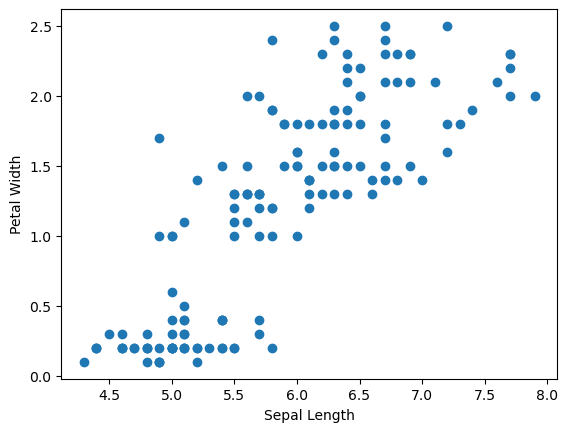

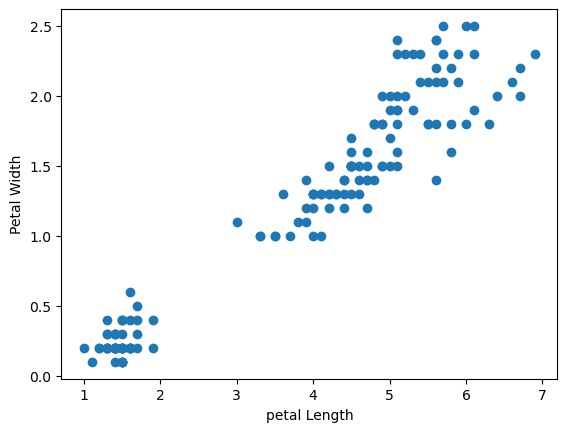

In [32]:
# reading the whole iris dataset csv and storing in data
data = pd.read_csv("C:/Users/Talha/Downloads/iris.csv")

#storing the individual values of each column in datastructure 
sepal_length=data['SepalLengthCm'].values
petal_length=data['PetalLengthCm'].values
petal_width=data['PetalWidthCm'].values

#displaying the data in scatter point form
plt.scatter(sepal_length,petal_width , label="Sepal Length and Petal Width")
# displaying the Independent variable Sepal Length on x-axis
plt.xlabel("Sepal Length")
# displaying the dependent variable Petal width on y-axix
plt.ylabel("Petal Width")
plt.show()

#Assuming values by looking at the data and calculating linear regression by applying formula 
true_slope1 = 0.3
true_intercept1 = 0.2
y_true1 = true_slope1 * petal_length + true_intercept1


true_slope2 = 0.3610
true_intercept2 = -0.100
y_true2 = true_slope2 * sepal_length + true_intercept2

#displaying the data in scatter point form
plt.scatter(petal_length,petal_width, label="Petal Length and Petal Width")
# displaying the Independent variable Petal Length on x-axis
plt.xlabel("petal Length")
# displaying the dependent variable Petal width on y-axix
plt.ylabel("Petal Width")
plt.show()

In [24]:
# calculating the correlation cofficient between Sepal length and petal width
corr_sl_pw = np.corrcoef(sepal_length, petal_width)
print("corelation matrix between Sepal length and petal width :")
print(corr_sl_pw)

# calculating the correlation cofficient between Petal length and Petal width
corr_pl_pw = np.corrcoef(petal_length, petal_width)
print("corelation matrix between petal length and petal width :")
print(corr_pl_pw)

# Displaying correlation coffecient of both form the correlation matrix
# using the index [0][1] as correlation cofficeint of both is present at this index
print("corelation cofficient between Sepal length and petal width :")
print(corr_pl_pw[0][1])
print("corelation cofficient between petal length and petal width :")
print(corr_sl_pw[0][1])

# by analyzing the data it can be seen that:
# correlation between Sepal length and petal width is 0.81795363 which is less as compared to other
# correlation between Petal Length and Petal Width is 0.9627571 whaich is greater than the other one

corelation matrix between Sepal length and petal width :
[[1.         0.81795363]
 [0.81795363 1.        ]]
corelation matrix between petal length and petal width :
[[1.        0.9627571]
 [0.9627571 1.       ]]
corelation cofficient between Sepal length and petal width :
0.9627570970509663
corelation cofficient between petal length and petal width :
0.8179536333691636


In [25]:
#------------- MODEL 1 -------------------------
# since the correlation cofficient of petal length and petal width is greater than other 
# the first model with be between petal length and petal width
with pm.Model() as model1:
    #the formula for simple linear regression is b0 + b1X
    rho=pm.Uniform('rho', -1, 1)
    #calculating the intercept for simple linear model that is b0 
    # taking mu=0 and sd=5 as prior
    intercept1 = pm.Normal('intercept1',mu=0, sd=5)
    #calculating the slope for simple linear model that is b1 
    # taking mu=0 and sd=5 as prior
    slope1 = pm.Normal('slope1', mu=0, sd=5)
    # applying the formula for simple linear regression
    y_pred1 = intercept1 + slope1 * petal_length
    likelihood1 = pm.Normal('likelihood1',mu=y_pred1,sd=np.std(petal_length),observed=petal_width)


MAP estimate:  {'rho_interval__': array(0.), 'intercept1': array(-0.36442371), 'slope1': array(0.41594295), 'rho': array(0.)}


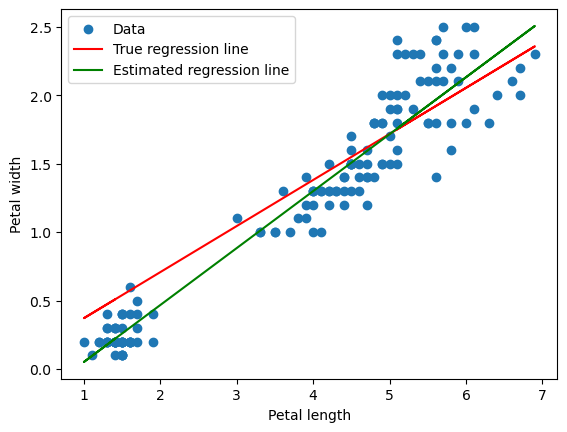

Slope: 0.41594294823487876
Intercept: -0.364423707314138


In [26]:
#plotting the model using mapestimate function
with model1:
    map_estimate = pm.find_MAP()
    print('MAP estimate: ',map_estimate)

plt.scatter(petal_length, petal_width, label='Data')
plt.plot(petal_length, y_true1, label='True regression line', color='red')
plt.plot(petal_length, map_estimate['slope1'] * petal_length + map_estimate['intercept1'], label='Estimated regression line', color='green')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()
print('Slope:', map_estimate['slope1'])
print('Intercept:', map_estimate['intercept1'])

In [27]:
#-------------------------------------------------------
# Model ended
#-------------------------------------------------------

In [33]:
#------------- MODEL 2 -------------------------
# since the correlation cofficient of sepal length and petal width is less than other 
# the first model will be between sepal length and petal width
with pm.Model() as model2:
    #the formula for simple linear regression is b0 + b1X
    #calculating the intercept for simple linear model that is b0 
    # taking mu=0 and sd=5 as prior
    intercept2 = pm.Normal('intercept2',mu=0, sd=10)
    #calculating the slope for simple linear model that is b1 
    # taking mu=0 and sd=5 as prior
    slope2 = pm.Normal('slope2', mu=0, sd=10)
    # applying the formula for simple linear regression
    y_pred2 =  slope2 * sepal_length + intercept2
    likelihood2 = pm.Normal('likelihood2',mu=y_pred2,sd=np.std(sepal_length),observed=petal_width)


MAP estimate:  {'intercept2': array(-3.19855761), 'slope2': array(0.7525447)}


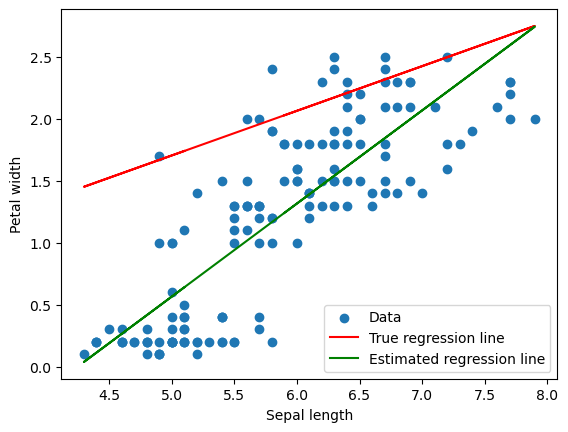

Slope: 0.7525446979754913
Intercept: -3.1985576112589156


In [34]:
#plotting the model using mapestimate function
with model2:
    map_estimate = pm.find_MAP()
    print('MAP estimate: ',map_estimate)

plt.scatter(sepal_length, petal_width, label='Data')
plt.plot(sepal_length, y_true2, label='True regression line', color='red')
plt.plot(sepal_length, map_estimate['slope2'] * sepal_length + map_estimate['intercept2'], label='Estimated regression line', color='green')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()
print('Slope:', map_estimate['slope2'])
print('Intercept:', map_estimate['intercept2'])

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope1, intercept1, rho]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 45 seconds.
The acceptance probability does not match the target. It is 0.9015382214067713, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


R2 score for Model 1: r2        0.148061
r2_std    0.005067
dtype: float64


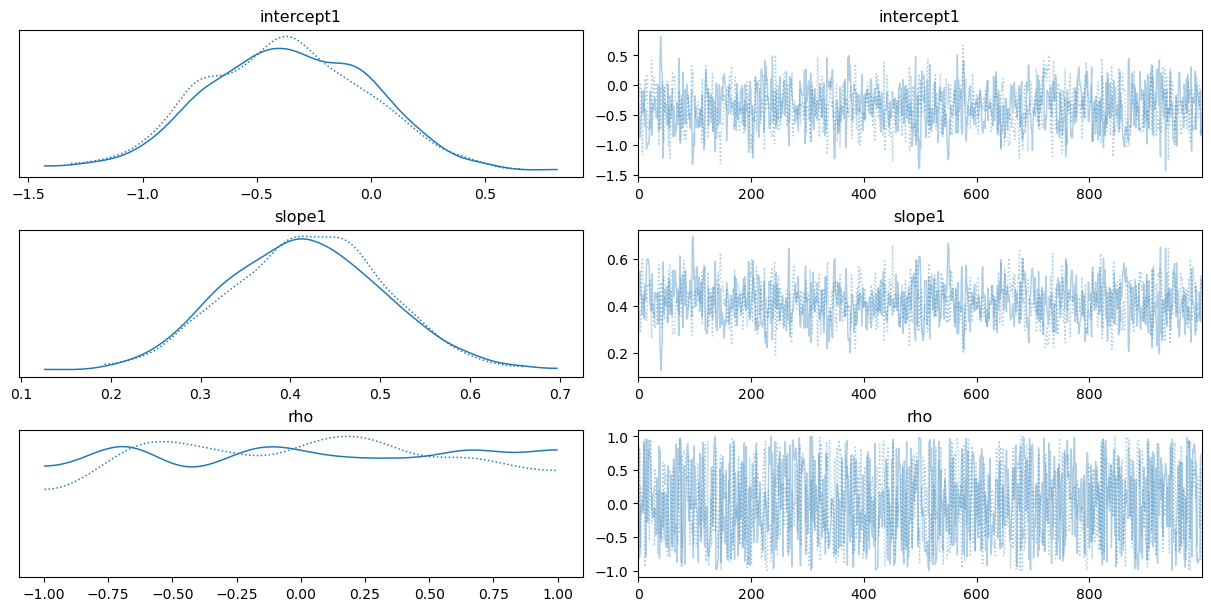

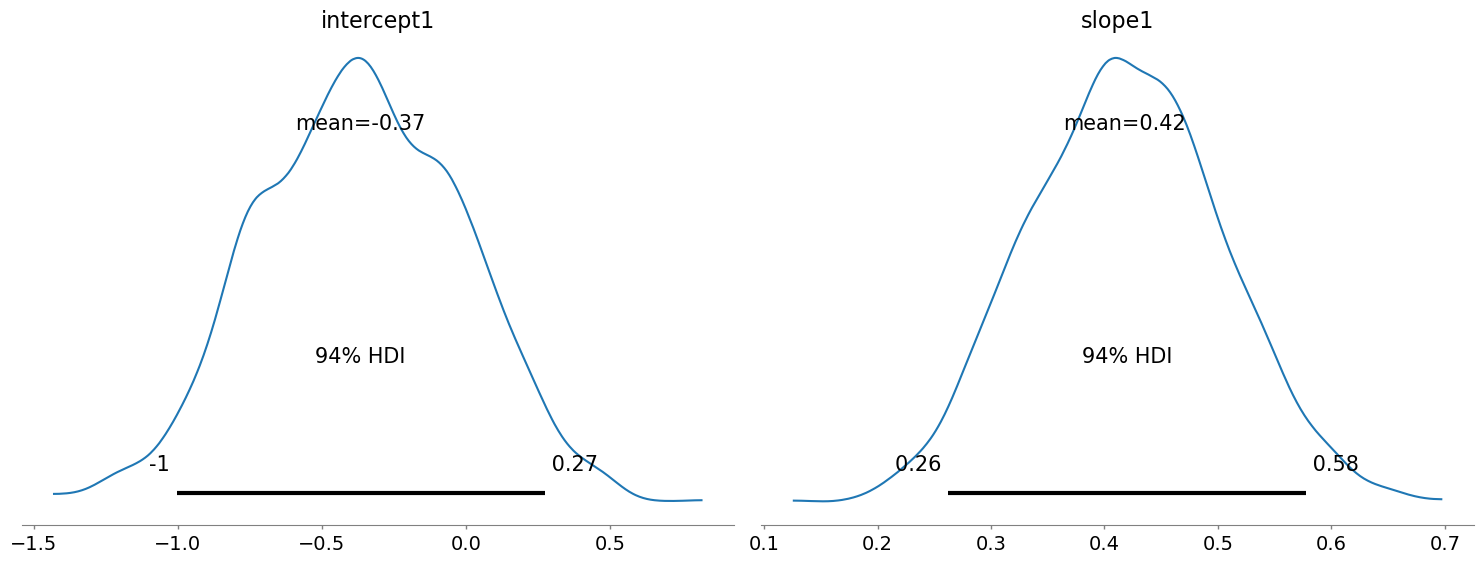

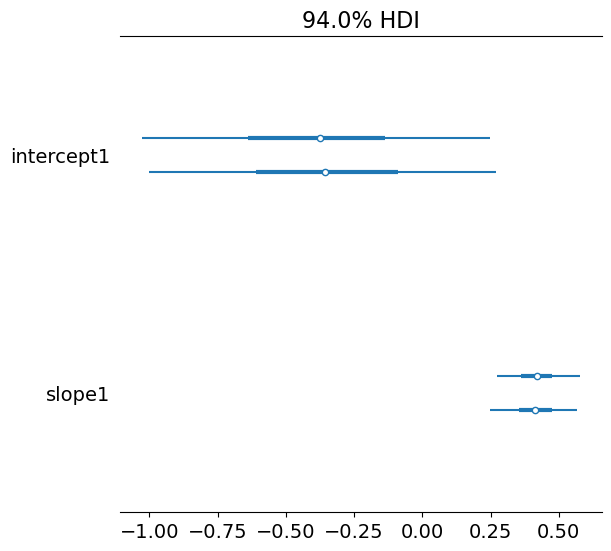

In [30]:
#--------------------------------------------------
# R-SQUARED MODEL 1
#--------------------------------------------------
#Now first take the posteroior based on previous model

with model1:
    trace1 = pm.sample(1000)  # You need to sample from the posterior
    az.plot_trace(trace1)
    az.plot_posterior(trace1, var_names=['intercept1', 'slope1'])
    az.plot_forest(trace1, var_names=['intercept1', 'slope1'])
    sp1 = pm.sample_posterior_predictive(trace1, samples=1000, model=model1)
    R_Squared_model1 = az.r2_score(petal_width, sp1['likelihood1'])
    print("R2 score for Model 1:", R_Squared_model1)


C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope2, intercept2]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 46 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


R2 score for Model 2: r2        0.366429
r2_std    0.009890
dtype: float64


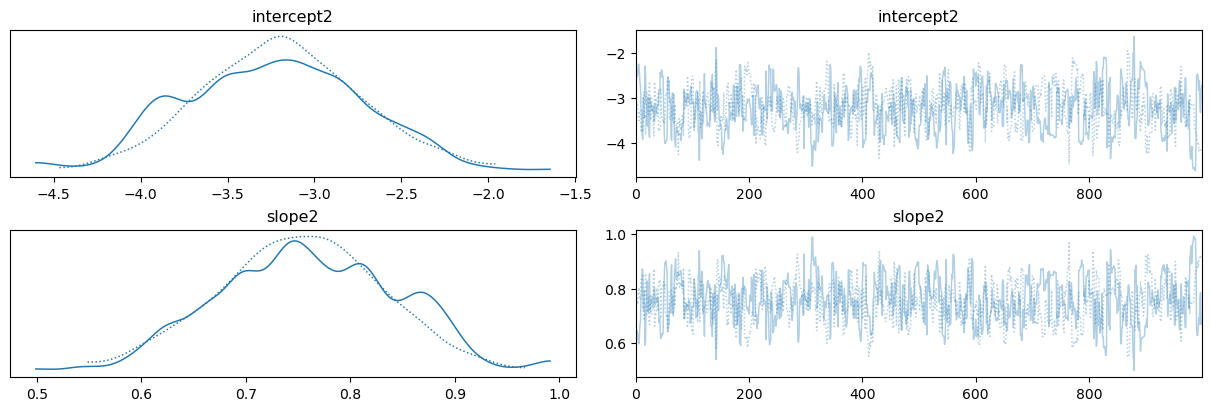

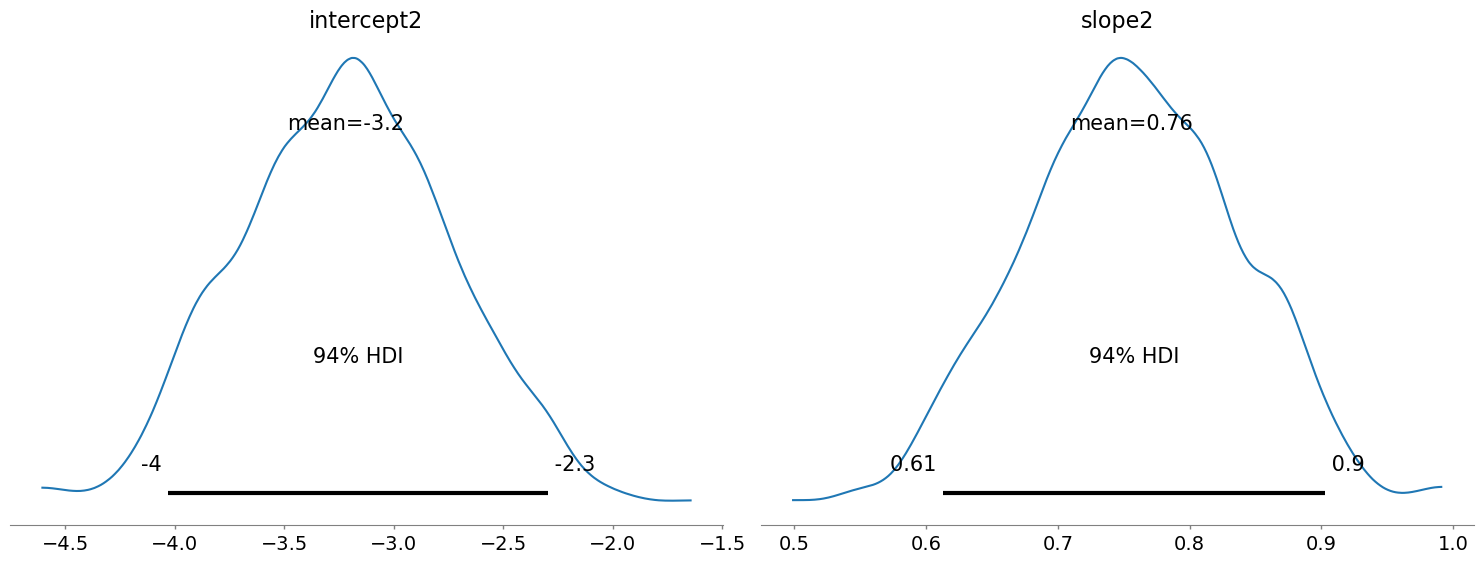

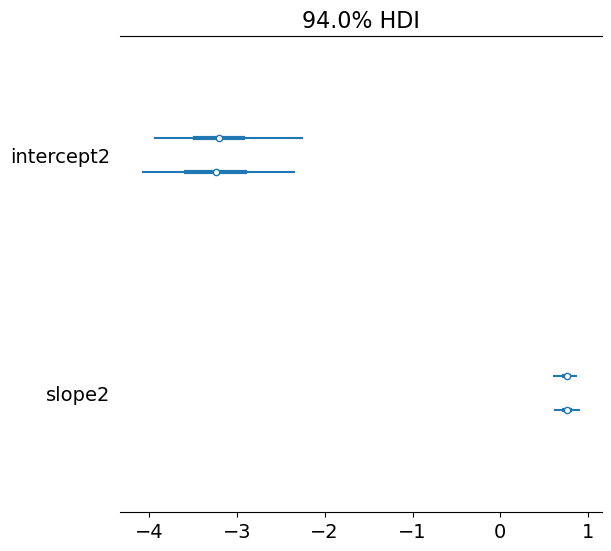

In [31]:
#--------------------------------------------------
# R-SQUARED MODEL 2
#--------------------------------------------------
#Now first take the posteroior based on previous model

with model2:
    trace2 = pm.sample(1000)  # You need to sample from the posterior
    az.plot_trace(trace2)
    az.plot_posterior(trace2, var_names=['intercept2', 'slope2'])
    az.plot_forest(trace2, var_names=['intercept2', 'slope2'])
    sp2 = pm.sample_posterior_predictive(trace2, samples=1000, model=model2)
    R_Squared_model2 = az.r2_score(petal_width, sp2['likelihood2'])
    print("R2 score for Model 2:", R_Squared_model2)